# Hyperparameter Experiment Results

In [8]:
from capo.analysis.utils import (
    get_results,
    aggregate_results,
    get_prompt_scores,
    generate_comparison_table,
)
from capo.analysis.visualizations import (
    plot_population_scores,
    plot_population_members,
    plot_population_scores_comparison,
    plot_length_score,
)

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
DATASETS = ["agnews", "gsm8k"]
# markes to choose: ["8","s","D","o","^","p","X"]

## Length Penalty

In [ ]:
hp_runs = [
    "CAPO_no_lp",
    "CAPO_gamma_0.01",
    "CAPO_gamma_0.02",
    "CAPO_gamma_0.05",
    "dummy",
    "dummy",
    "CAPO_gamma_0.1",
]
markers = ["8", "s", "d", "o", None, None, "p"]
labels = [
    r"$\gamma=0$",
    r"$\gamma=0.01$",
    r"$\gamma=0.02$",
    r"$\gamma=0.05$ (CAPO)",
    "Dummy",
    "Dummy",
    r"$\gamma=0.1$",
]

Failed to load agnews for dummy: No objects to concatenate
Failed to load agnews for dummy: No objects to concatenate
Failed to load gsm8k for dummy: No objects to concatenate
Failed to load gsm8k for dummy: No objects to concatenate


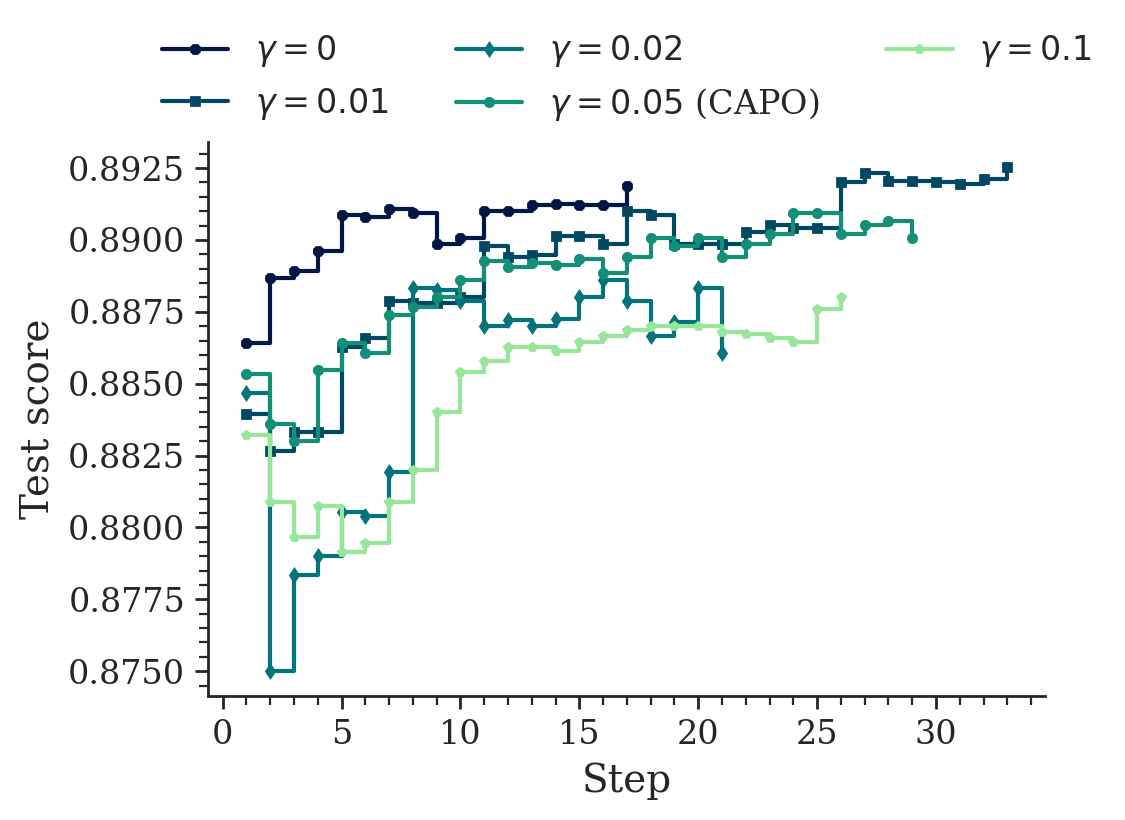

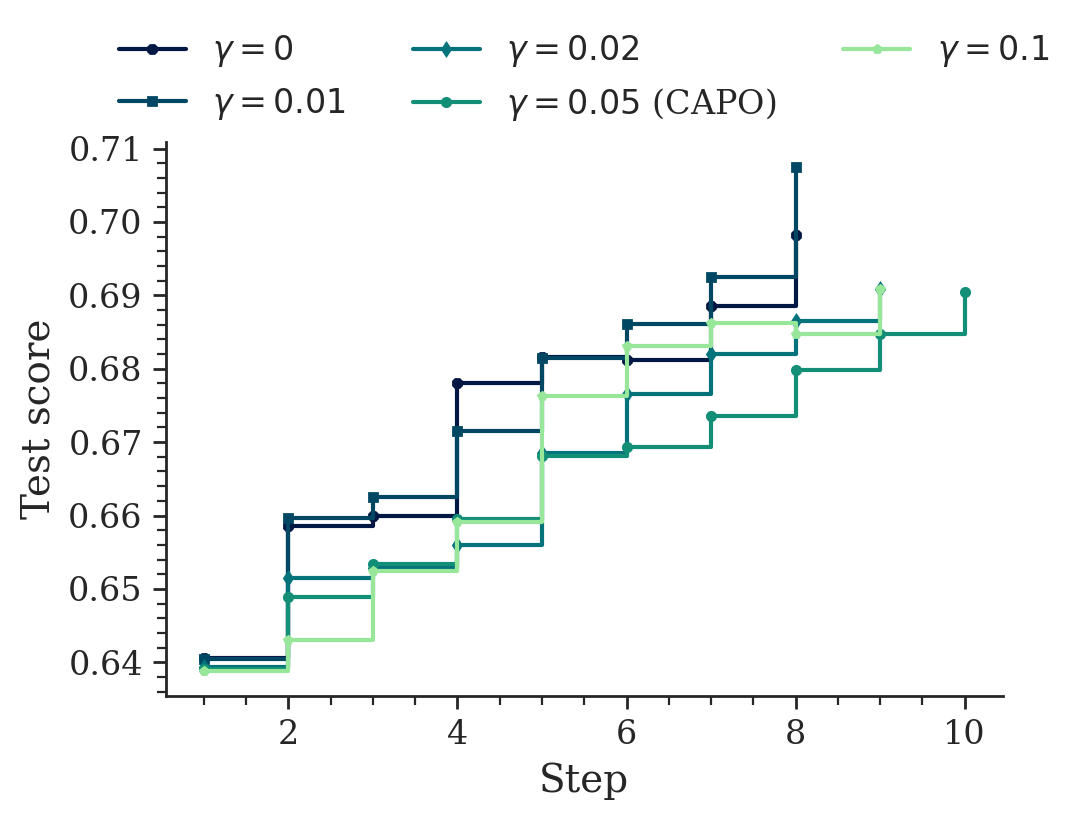

In [71]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        hp_runs,
        "mean",
        plot_seeds=False,
        plot_stddev=False,
        x_col="step",
        path_prefix="../..",
        score_col="test_score",
        continuous_colors=True,
        markers=markers,
        labels=labels,
    );

- test score is just slightly better without length penalty

Failed to load gsm8k for dummy: No objects to concatenate
Failed to load gsm8k for dummy: No objects to concatenate


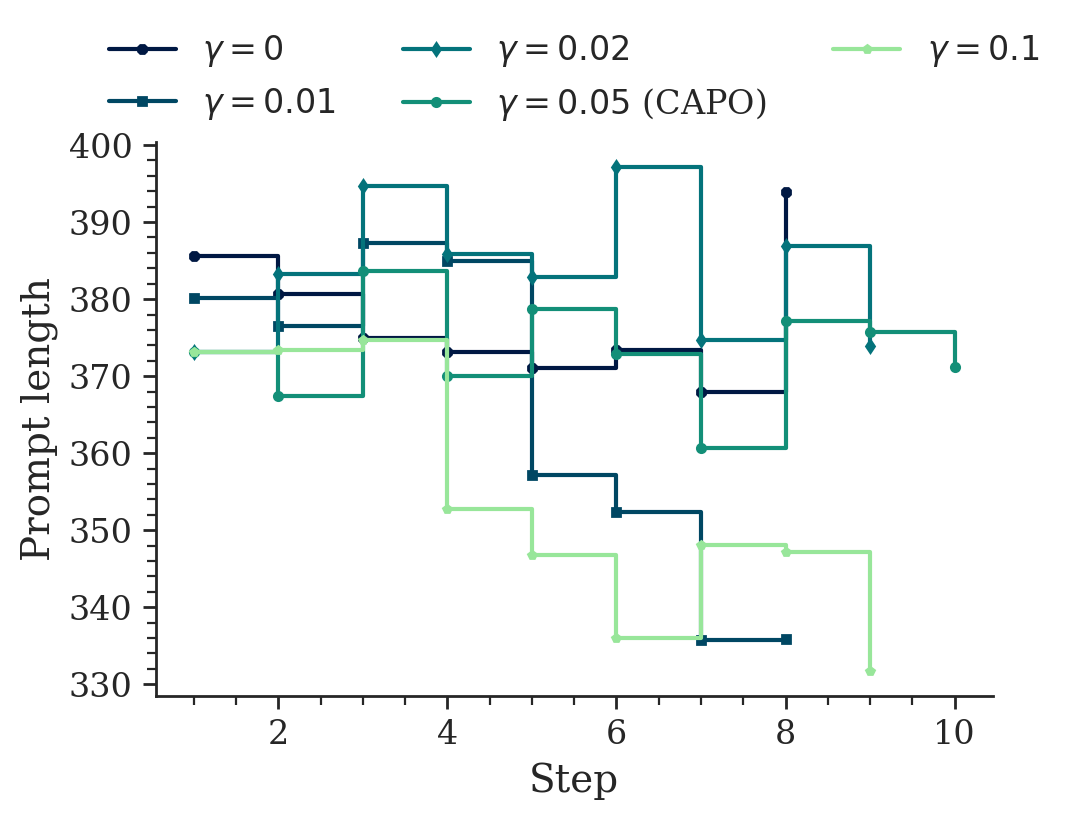

In [76]:
plot_population_scores_comparison(
    "gsm8k",
    "llama",
    hp_runs,
    "mean",
    plot_seeds=False,
    plot_stddev=False,
    x_col="step",
    path_prefix="../..",
    score_col="prompt_len",
    continuous_colors=True,
    markers=markers,
    labels=labels,
);

- prompt length is clearly shorter than without the length penalty

- we can see this also for gsm8k but the effect is smaller here

Failed to load agnews for nan: No objects to concatenate
Failed to load agnews for nan: No objects to concatenate
Failed to load gsm8k for nan: No objects to concatenate
Failed to load gsm8k for nan: No objects to concatenate


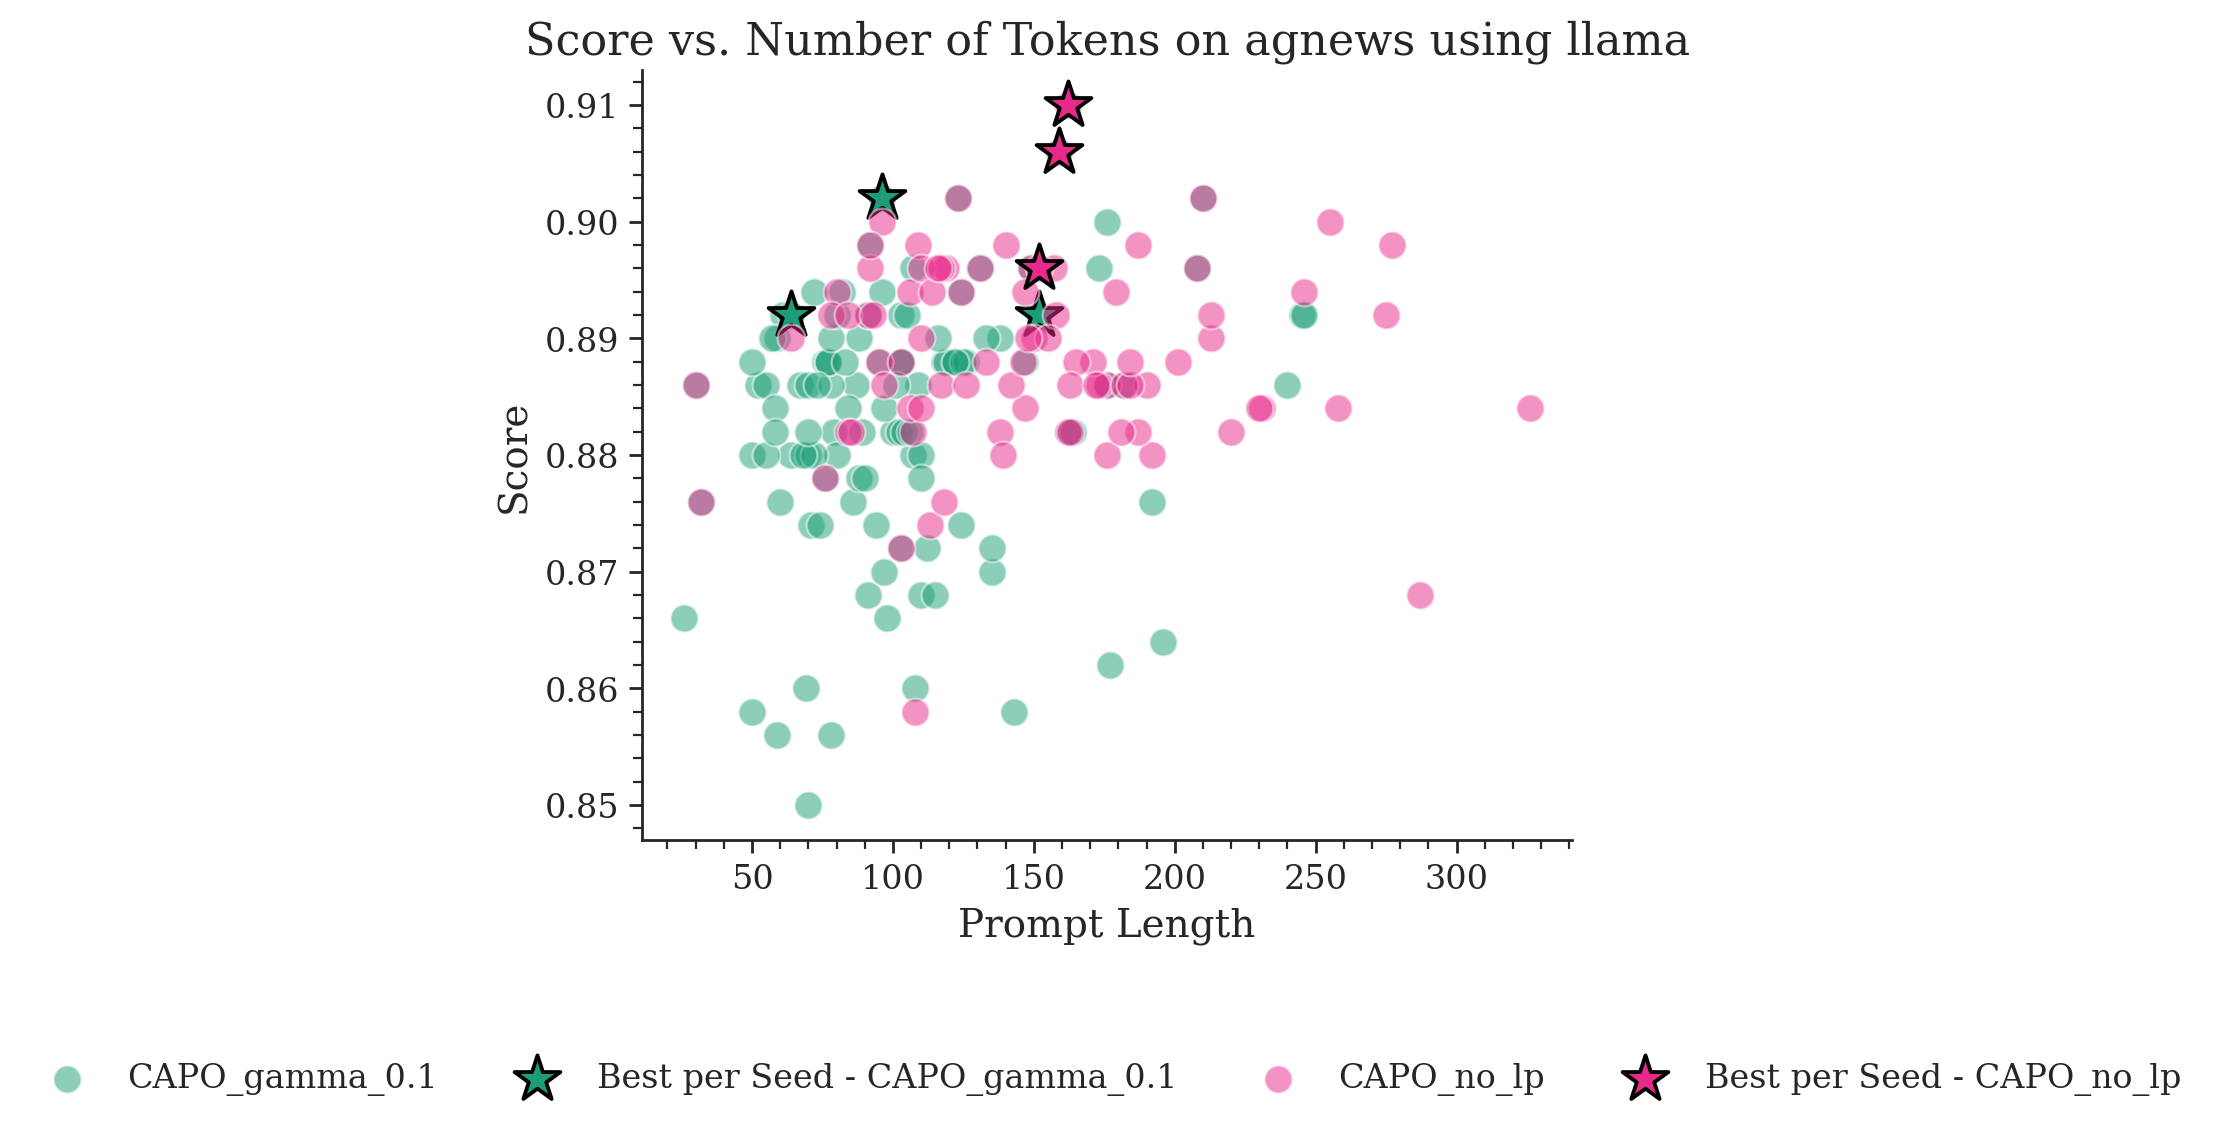

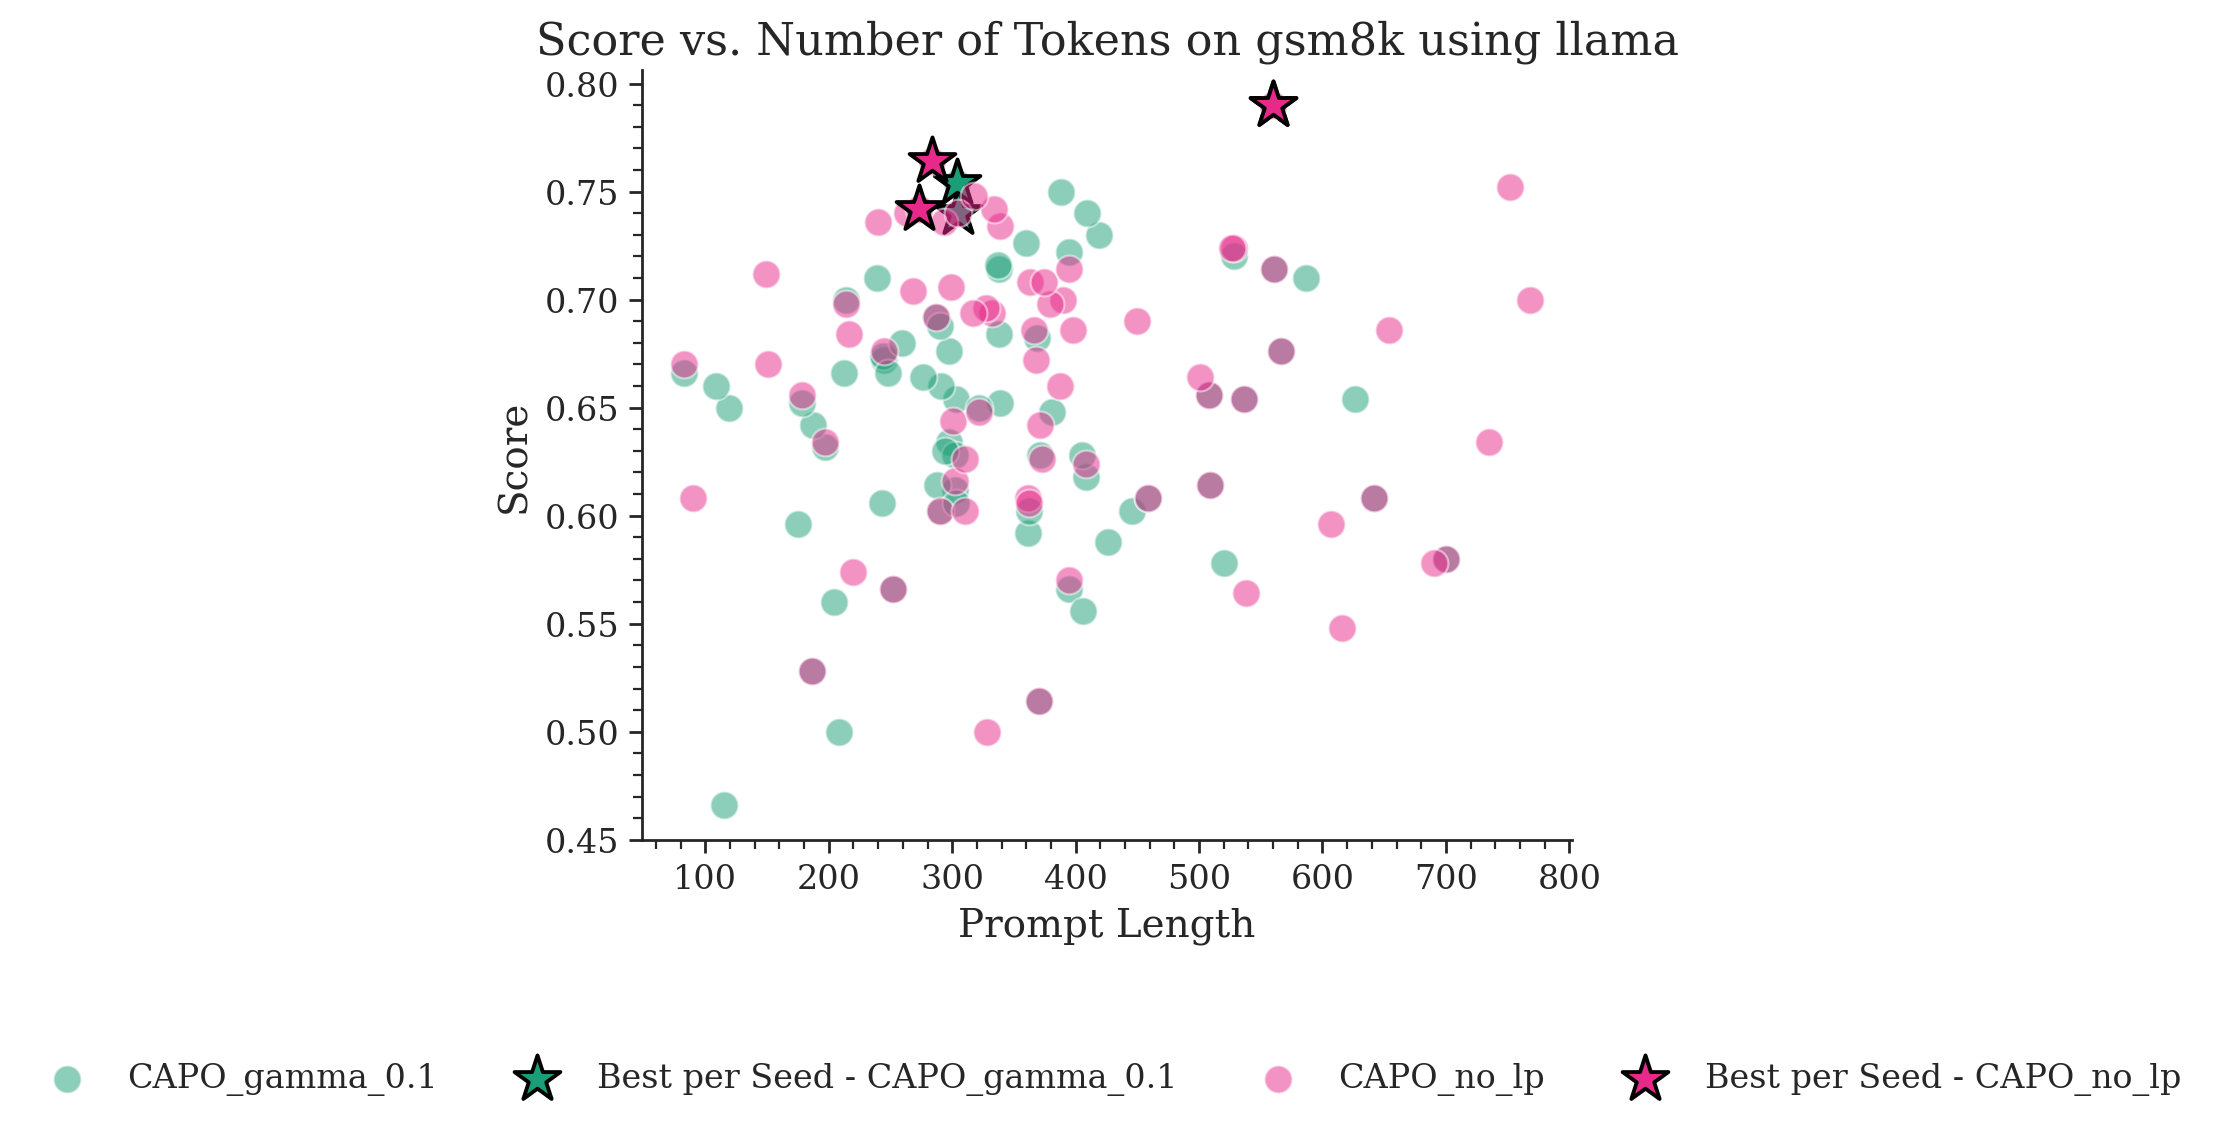

In [13]:
for dataset in DATASETS:
    plot_length_score(
        dataset,
        "llama",
        ["CAPO_gamma_0.1", "nan", "nan", "CAPO_no_lp"],
        path_prefix="../..",
        x_col="prompt_len",
        score_col="test_score",
        log_scale=False,
    );

- for agnews we can see that all prompts tend to be clearly longer than for a high length penalty and the best scores also are longer without the penalty
- for gsm8k this can only be seen in the extremes

In [9]:
generate_comparison_table(DATASETS, hp_runs, "llama", path_prefix="../..")

,agnews,gsm8k,avg
CAPO_gamma_0.01,89.53±0.31,75.27±3.8,82.4
CAPO_gamma_0.05,89.07±0.64,73.73±4.57,81.4
CAPO_gamma_0.1,88.73±1.36,74.8±3.86,81.77
CAPO_no_lp,89.27±0.5,74.93±1.27,82.1


In [10]:
generate_comparison_table(DATASETS, hp_runs, "llama", path_prefix="../..", score_col="prompt_len")

,agnews,gsm8k,avg
CAPO_gamma_0.01,119.67±56.8,462.67±169.45,291.17
CAPO_gamma_0.05,106.67±60.35,480.67±138.28,293.67
CAPO_gamma_0.1,97.0±35.76,475.33±147.51,286.17
CAPO_no_lp,127.67±33.32,297.0±32.51,212.33


- works very good for agnews, but not for gsm8k

### Conclusion
- we can perform more steps if we choose a higher length penalty (because the prompts are then also shorter)

## Population Size

In [83]:
hp_runs = ["CAPO_pop_6", "CAPO_pop_8", "CAPO_pop_10", None, "CAPO_pop_12"]
markers = ["8", "s", "o", None, "p"]
labels = [r"$\mu=6$", r"$\mu=8$", r"$\mu=10$ (CAPO)", "Dummy", r"$\mu=12$"]

Failed to load agnews for Dummy: No objects to concatenate
Failed to load agnews for Dummy: No objects to concatenate
Failed to load gsm8k for Dummy: No objects to concatenate
Failed to load gsm8k for Dummy: No objects to concatenate


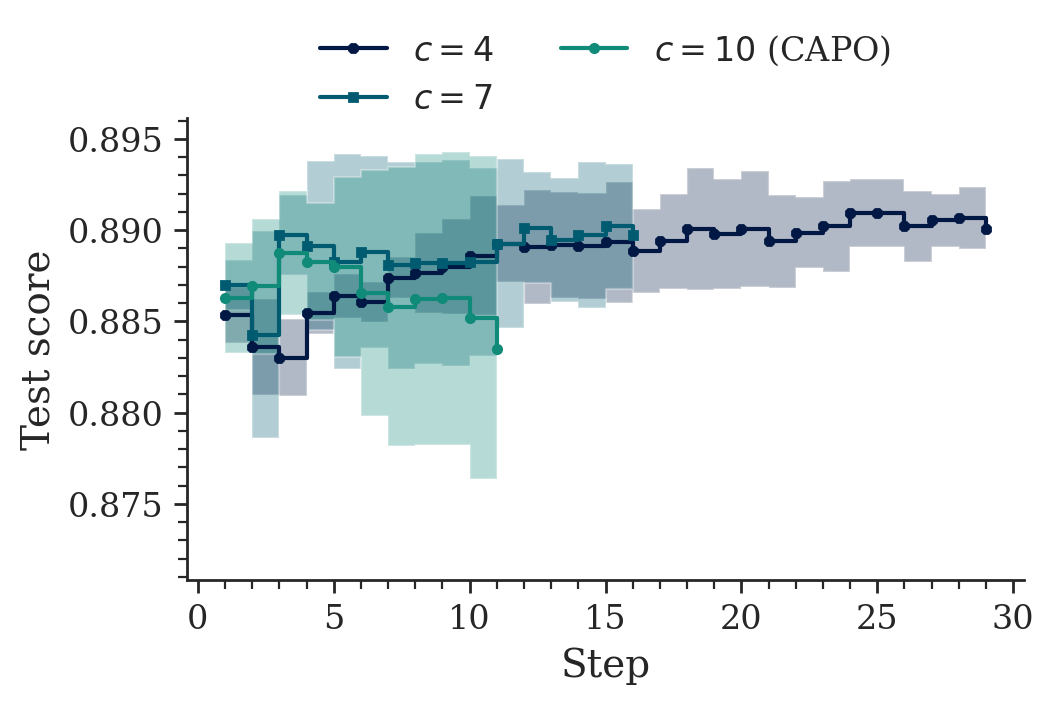

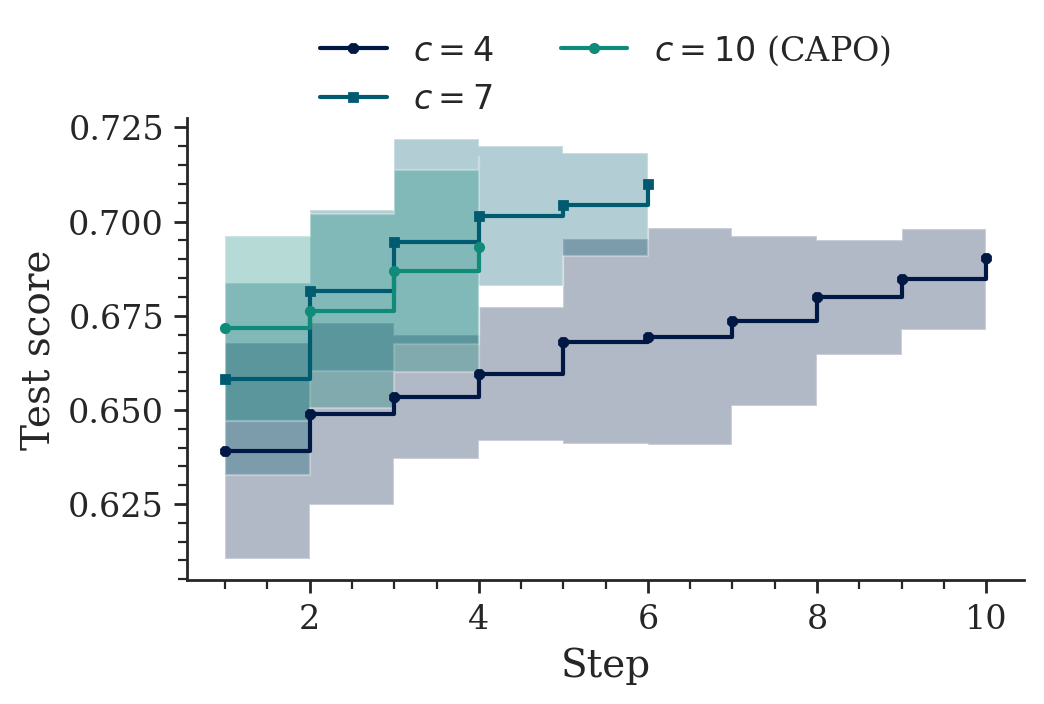

In [90]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        hp_runs,
        "mean",
        plot_seeds=False,
        plot_stddev=True,
        x_col="step",
        path_prefix="../..",
        score_col="test_score",
        continuous_colors=True,
        markers=markers,
        labels=labels,
        ncols=2,
        figsize=(5.4, 3),
    );

- population size does not have a measurable effect on the performance
- higher standard deviation for smaller population sizes
- we are quite robust for this hyperparameter (i would not say so? i would say this is a tuning parameter with some influence that is not trivial to choose / depends on the task)

## Number of Crossovers

In [88]:
hp_runs = ["CAPO_ncrossovers_4", "CAPO_ncrossovers_7", "CAPO_ncrossovers_10", "Dummy", "Dummy"]
markers = ["8", "s", "o", None, None]
labels = [r"$c=4$", r"$c=7$", r"$c=10$ (CAPO)", "Dummy", "Dummy"]

Failed to load agnews for Dummy: No objects to concatenate
Failed to load agnews for Dummy: No objects to concatenate
Failed to load gsm8k for Dummy: No objects to concatenate
Failed to load gsm8k for Dummy: No objects to concatenate


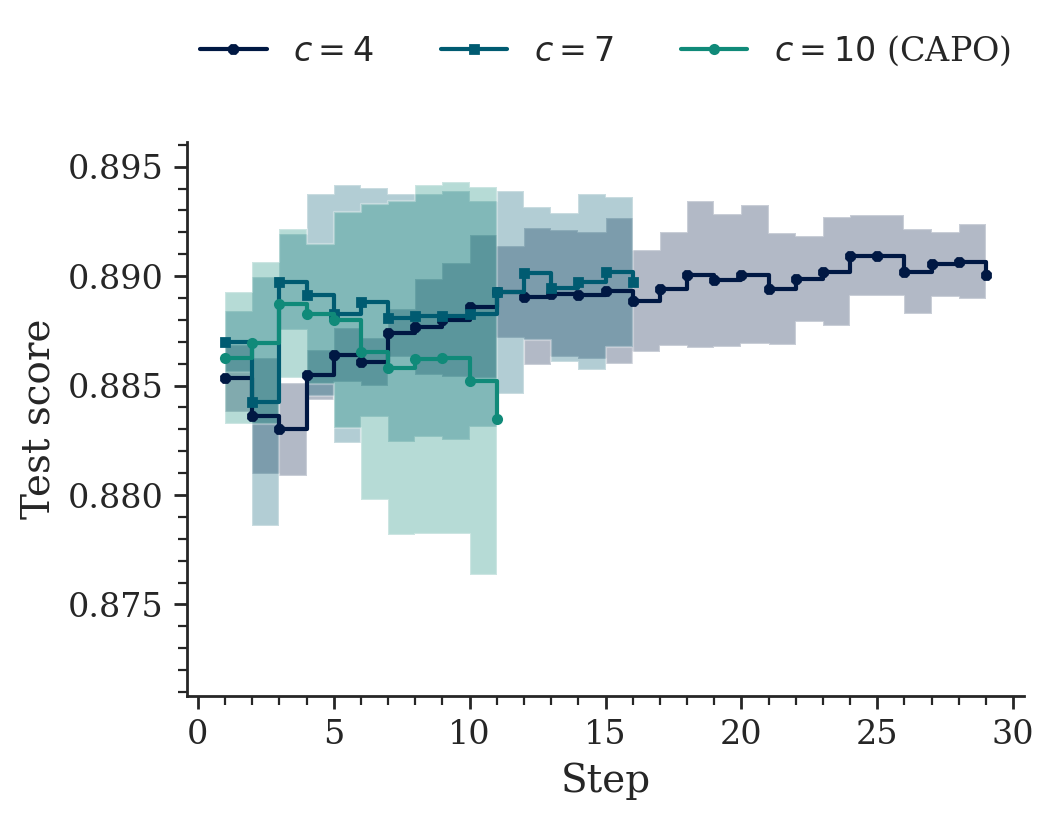

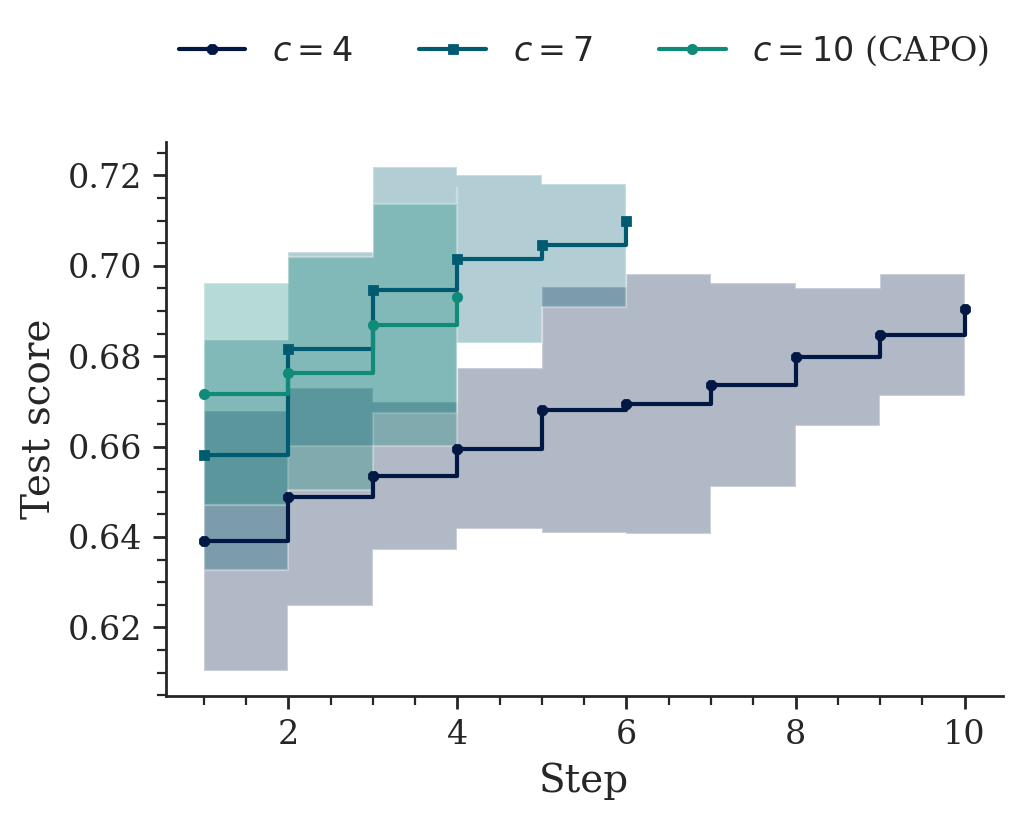

In [89]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        hp_runs,
        "mean",
        plot_seeds=False,
        plot_stddev=True,
        x_col="step",
        path_prefix="../..",
        score_col="test_score",
        continuous_colors=True,
        markers=markers,
        labels=labels,
    );

- with less crossovers we can do much more steps (do not have to evaluate to many new prompts)
- agnews has a higher variance with 10 crossovers
- slightly better performacne for n_crossovers = 7 (might have been a better choice - we are more sensitive to this hyperparameter than to the one we looked at before)